In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

warnings.filterwarnings('ignore')

# 비지도 학습의 종류
*   비지도 변환(unsupervised transformation)
*   군집(clustering)

## 비지도 변환?

사람이나 다른 머신러닝 알고리즘이 보다 쉽게 해석할 수 있도록 데이터를 변환하는 알고리즘.
비지도 변환이 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서, 
꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionality reduction)이다.

## 군집?
데이터를 비슷한 것 끼리 그룹으로 묶는 것.

## 데이터 전처리와 스케일 조정

신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하다.<br>
그래서 보통 이런 알고리즘들에 맞게 데이터의 특성 값을 조정한다.<br>
보통 특성마다 스케일을 조정해서 데이터를 변경한다.

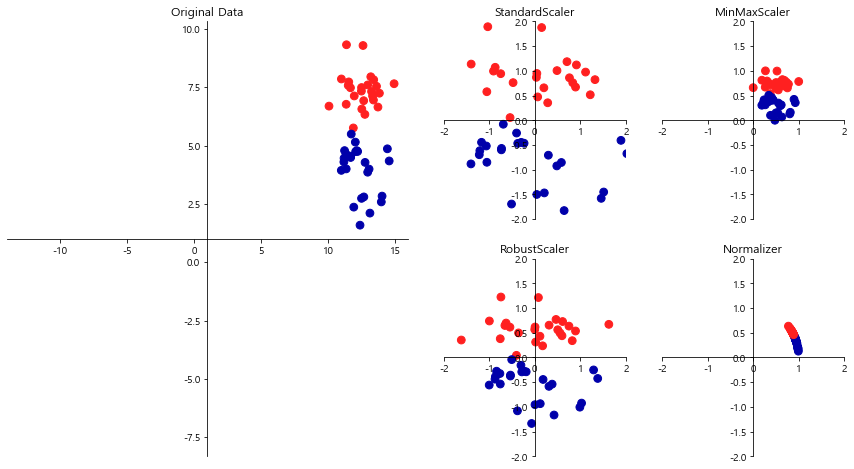

In [2]:
import mglearn

mglearn.plots.plot_scaling()

## 데이터 변환 적용하기

스케일을 조정하는 전처리 Method들은 보통 지도 학습 알고리즘을 적용하기 전에 적용한다.<br>
예제에서는 cancer 데이터셋에 커널SVM(SVC)을 적용하고, <br>
데이터 전처리에는 MinMaxScaler를 사용할 것이다.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [5]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 데이터셋의 속성을 출력
print(f"변환된 후 크기: {X_train_scaled.shape}")
print(f"스케일 조정 전 특성별 최소값:\n {X_train.min(axis=0)}")
print(f"스케일 조정 전 특성별 최대값:\n {X_train.max(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_train_scaled.min(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_train_scaled.max(axis=0)}")

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최소값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
print(f"스케일 조정 후 특성별 최소값:\n {X_test_scaled.min(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_test_scaled.max(axis=0)}")

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최소값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


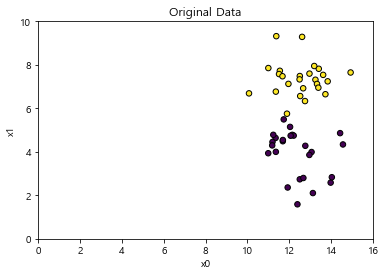

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

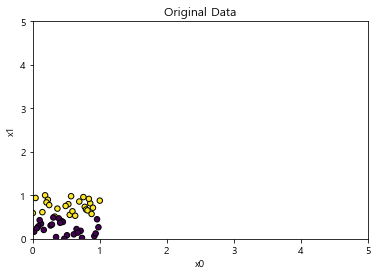

In [8]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

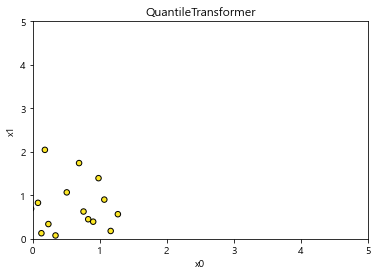

In [9]:

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(f'{type(scaler).__name__}')
plt.show()

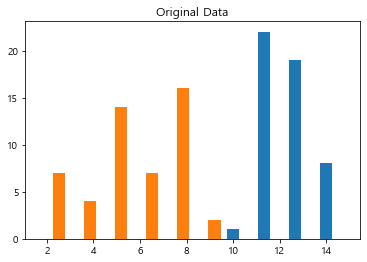

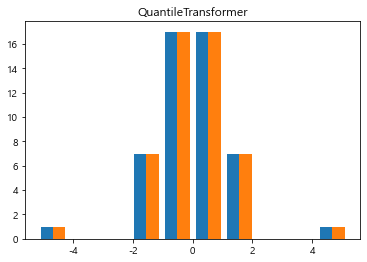

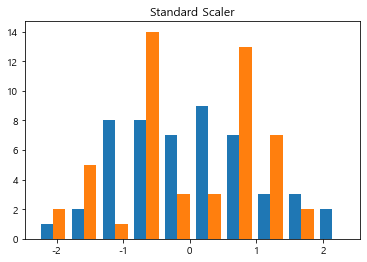

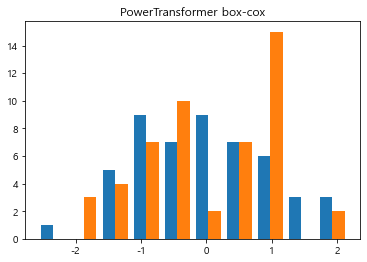

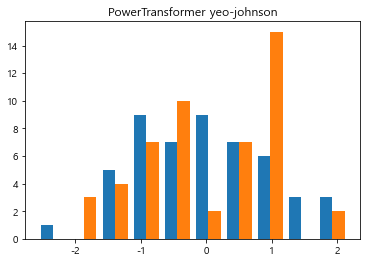

In [10]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('Standard Scaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()


## 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [11]:
from sklearn.svm import SVC 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print(f"테스트 정확도: {svm.score(X_test, y_test): .2f}")

테스트 정확도:  0.63


In [12]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print(f"스케일 조정된 테스트 정확도: {svm.score(X_test_scaled, y_test): .2f}")

스케일 조정된 테스트 정확도:  0.95


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print(f"스케일(Standard) 조정된 테스트 정확도: {svm.score(X_test_scaled, y_test): .2f}")

스케일(Standard) 조정된 테스트 정확도:  0.97


# 차원 축소, 특성 추출, 매니폴드 학습

비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지이다.<br>
가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.<br><br>

## 차원축소

### 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다.<br>
다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타낸 것이다


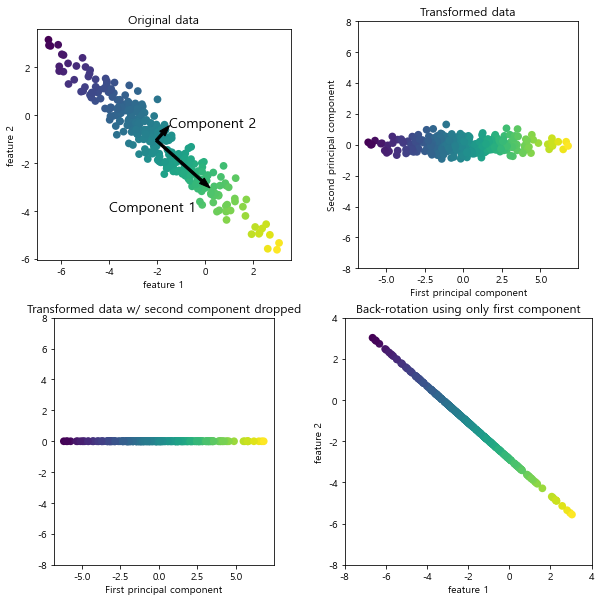

In [14]:
mglearn.plots.plot_pca_illustration()

Original data -> Transformed data -> Trasformed data w/ second component dropped -> Back-rotation using only first component

잘 모르겠지만.. PCA 를 사용하여 차원축소(2 -> 1차원)를해서 데이터 다이어트를하고..<br>
노이즈를 제거하며 주성분에서 유지되는 정보를 시각화하는 데 종종 사용한다고 한다.

#### PCA를 적용해 유방암 데이터셋 시각화하기

PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화이다.<br>
유방암 데이터셋의 경우 특성을 30개나 가지고 있어서 435개의 산점도를 그려야 한다고 한다..<br>
30 * 14.5 = 435..

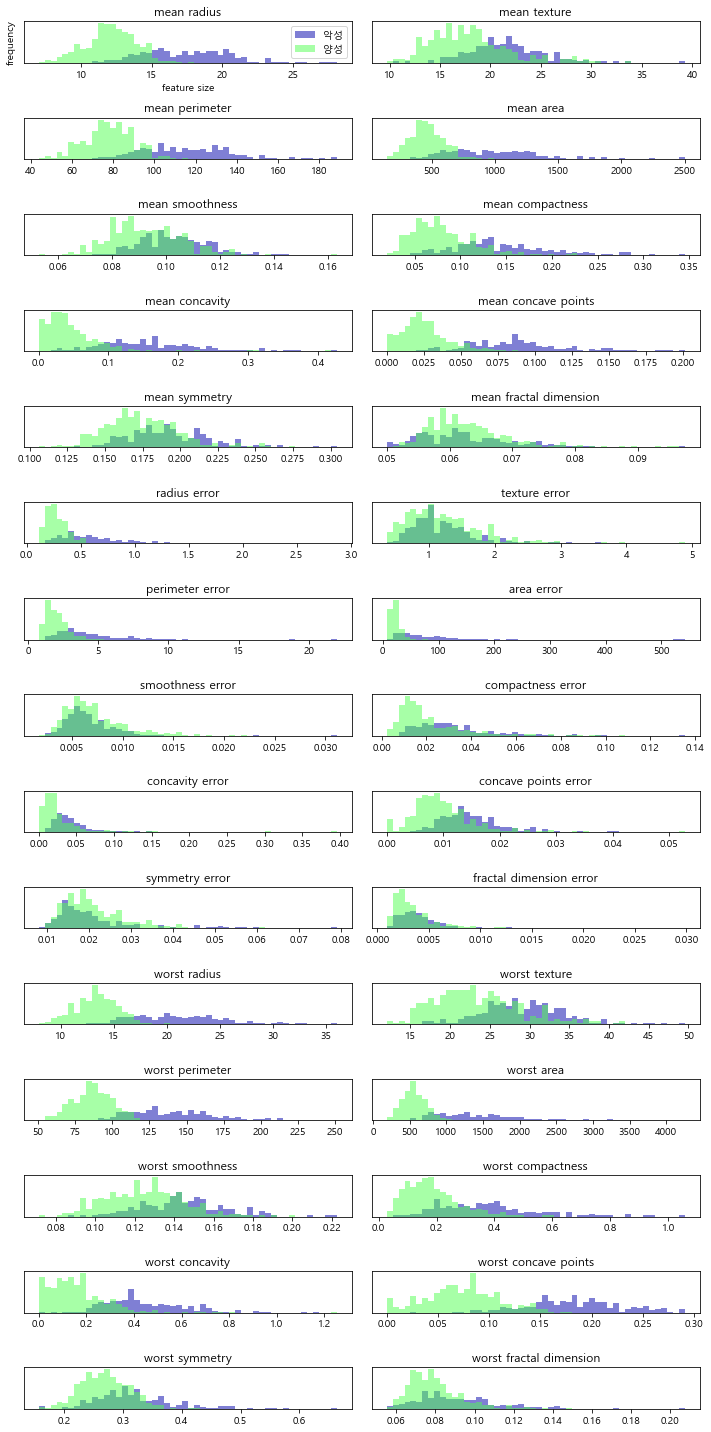

In [15]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['악성', '양성'], loc='best')
fig.tight_layout()

위 히스토그램은 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해 볼 수 있다.<br>
하지만 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다.<br>
PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있다.

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [17]:
from sklearn.decomposition import PCA

# 데이터의 처음 두 개의 주성분만 유지한다.
pca = PCA(n_components=2)

# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print(f"원본 데이터 형태: {str(X_scaled.shape)}")
print(f"축소된 데이터 형태: {str(X_pca.shape)}")

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

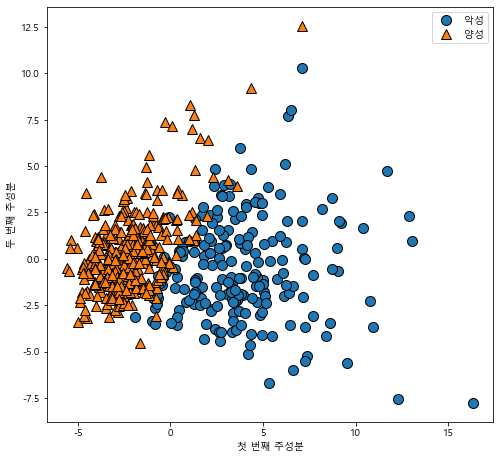

In [18]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

Text(0, 0.5, '주성분')

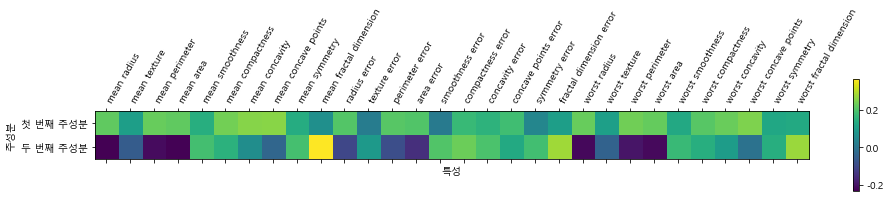

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

#### 고유얼굴(eigenface) 특성 추출

PCA는 특성 추출에도 이용한다.<br>
이미지는 RGB의 강도가 기록된 픽셀로 구성된다.<br>
PCA를 이용하여 LFW(Labeled Faces in the Wild) 데이터셋의 얼굴 이미지에서 특성을 추출하는 아주 간단한<br>
어플리케이션을 만들어보자

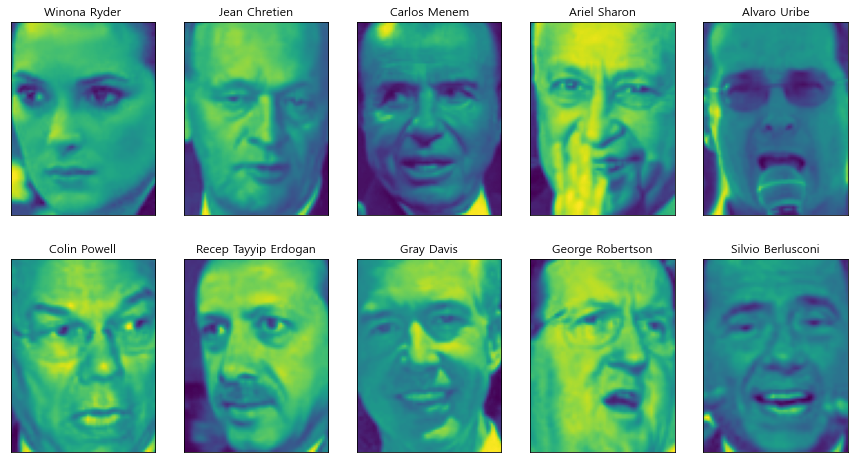

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

데이터셋의 편증을 없애기 위해 사람마다 50개의 이미지만 선택

In [21]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0 ~ 1 스케일로 조정
# MinMaxScaler를 적용하는 것과 거의 같다.
X_people = X_people / 255.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"1-최근접 이웃의 테스트 세트 점수: {knn.score(X_test, y_test): .2f}")

1-최근접 이웃의 테스트 세트 점수:  0.23


처참....

얼굴의 유사도를 측정할 때 같은 위치에 존재하는 이웃 픽셀 값과 비교하면 픽셀 하나만 움직여도 완전히 다른 결과를 부른다..<br>
이럴때 PCA를 사용해서 변화를 줘보자(Scaling)

In [23]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f"PCA 후 1-최근접 이웃의 테스트 세트 점수: {knn.score(X_test_pca, y_test): .2f}")

PCA 후 1-최근접 이웃의 테스트 세트 점수:  0.31


0.01 % 올랐는데... 책에서 사용하는 데이터에서 뭔가 업데이트가 되서 그런거 같다 ㅠ<br>
책에서는 23% -> 31% 로 유의미한 성능 증가를 나타냈다

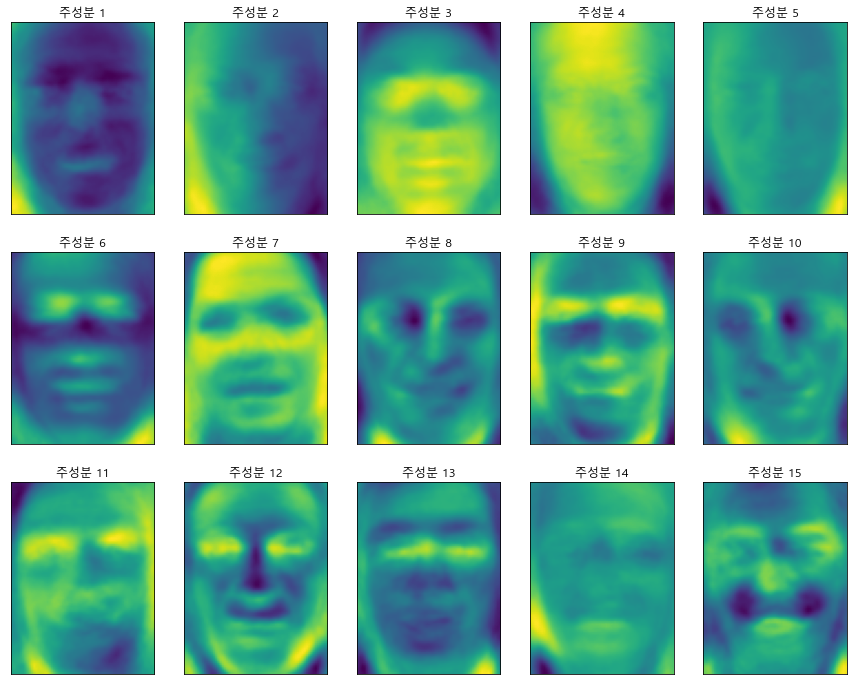

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f"주성분 {i+1}")

실습 데이터의 성능이 더 낮은 원인은 아무래도<br>
교재에서는 얼굴만 나온것에 반해 실습 데이터는 상반신(어깨 밑단까지)이 나와서 판별해야 할 데이터가 더 많아져서 그런 듯 싶다

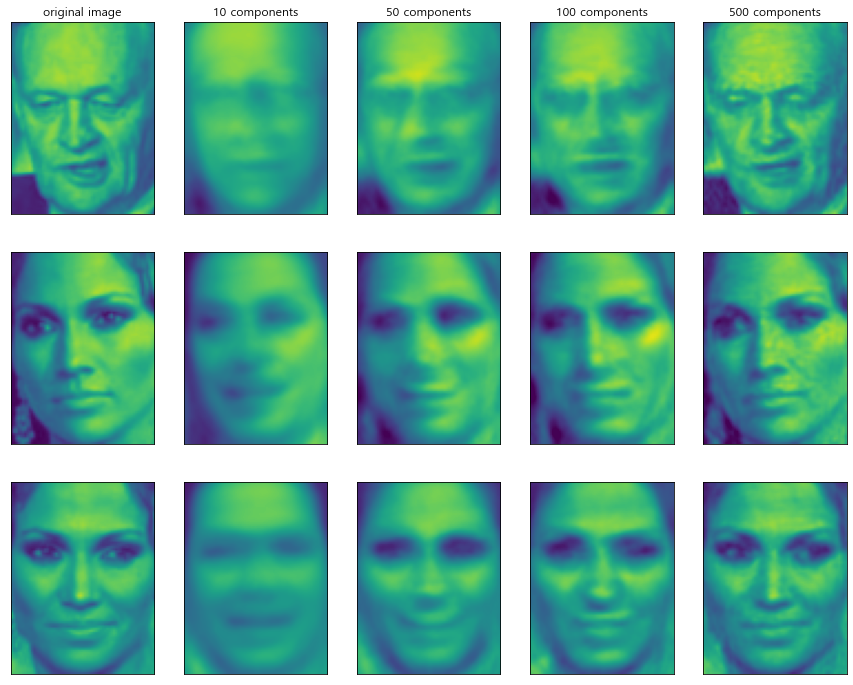

In [25]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'second PCA')

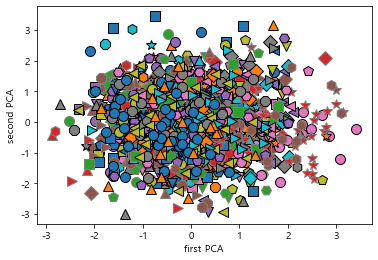

In [26]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("first PCA")
plt.ylabel("second PCA")

#### 비음수 행렬 분해(NMF)

NMF(non-negative matrix factorization)는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘이다.<br>
PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면,<br>
NMF에서는 음수가 아닌 성분과 계수 값을 찾는다.<br>
즉, 주성분과 계수가 모두 0보다 크거나 같아야 한다.

##### 인위적 데이터에 NMF 적용하기

PCA와 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야한다.<br>
이 말은 데이터가 원점(0, 0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다.

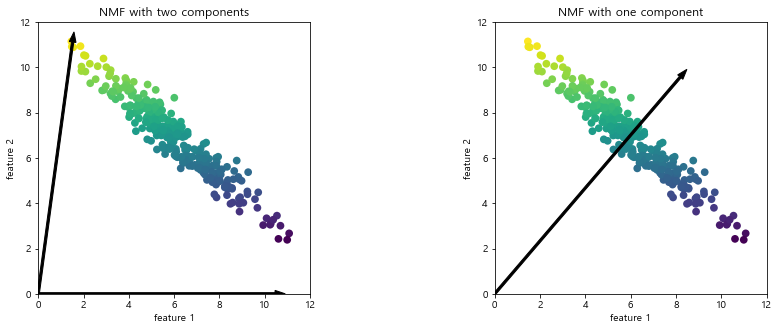

In [27]:
mglearn.plots.plot_nmf_illustration()

##### 얼굴 이미지에 NMF 적용하기

PCA보다 품질이 떨어지는 것을 확인할 수 있다.<br>
PCA는 재구성 측면에서 최선의 방향을 찾고,<br>
NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는, 주로 데이터에 있는 유용한 패턴을 찾는 데 활용한다.

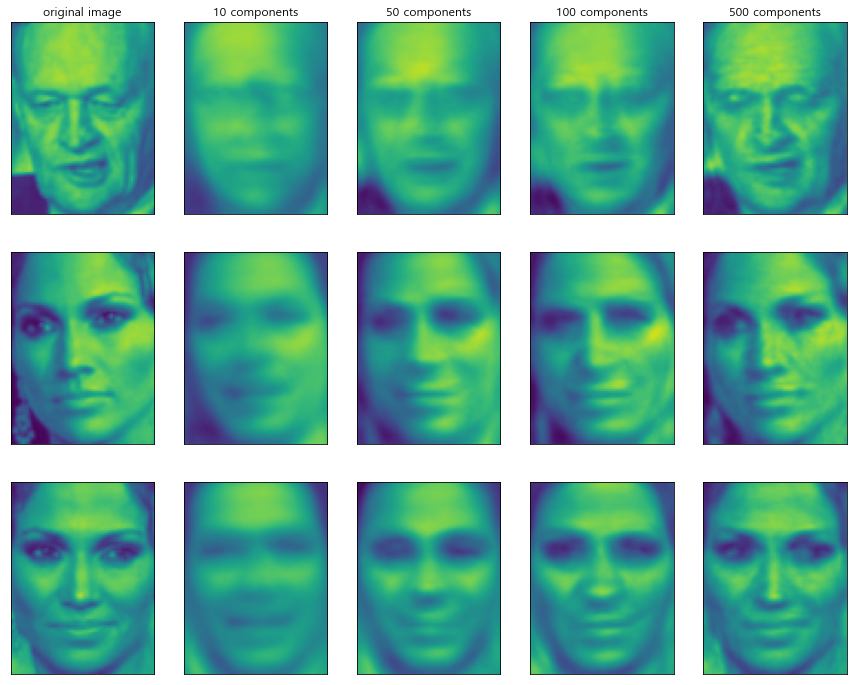

In [28]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

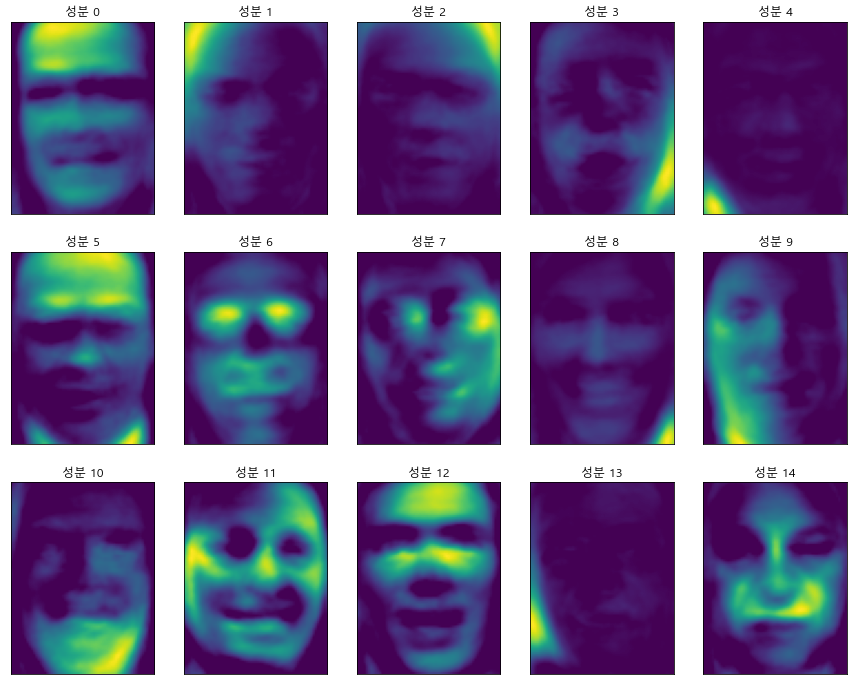

In [29]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000,
         tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}". format(i))

Text(0, 0.5, '신호')

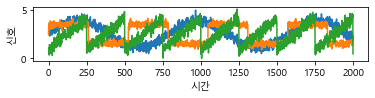

In [30]:
S = mglearn.datasets.make_signals()

plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

In [31]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(f"측정 데이터 형태: {X.shape}")

측정 데이터 형태: (2000, 100)


NMF를 사용해 세 개의 신호를 복원

In [32]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1)
S_ = nmf.fit_transform(X)

print(f"복원한 신호 데이터 형태: {S_.shape}")

복원한 신호 데이터 형태: (2000, 3)


비교를 위해서 PCA도 적용

In [33]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

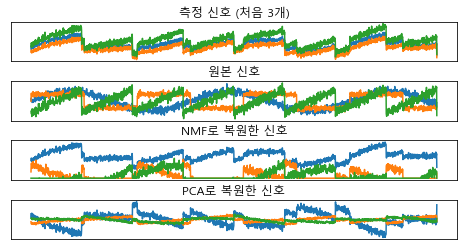

In [34]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
        '원본 신호',
        'NMF로 복원한 신호',
        'PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

#### t-SNE를 이용한 매니폴드 학습

매니폴드 학습알고리즘이라고 하는 시각화 알고리즘들은 복잡한 매핑을 만들어 더 나은 시각화를 제공한다.<br>
특히 t-SNE 알고리즘을 아주 많이 사용한다.

매니폴드 학습 알고리즘은 그 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없다.<br>

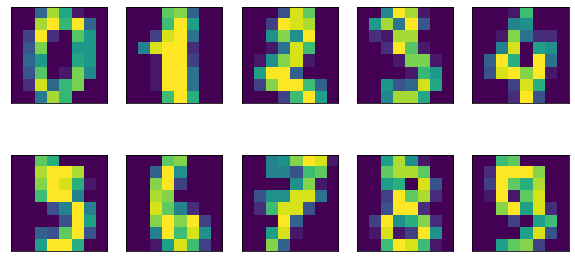

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), 
                        subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

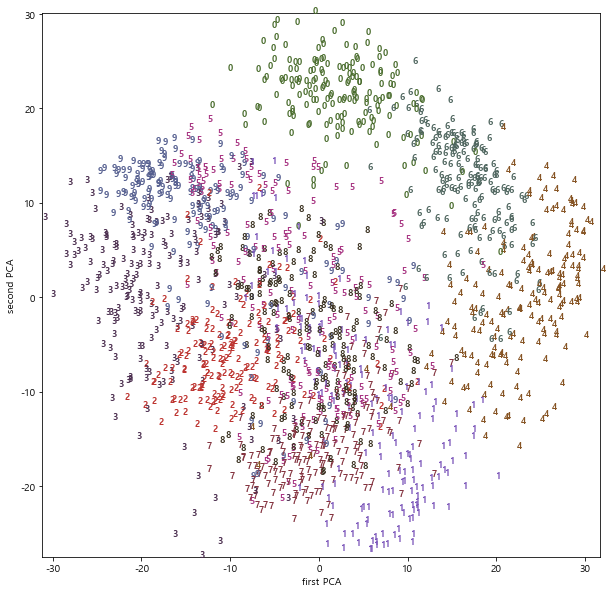

In [36]:
# PCA 모델 생성
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('first PCA')
    plt.ylabel('second PCA')

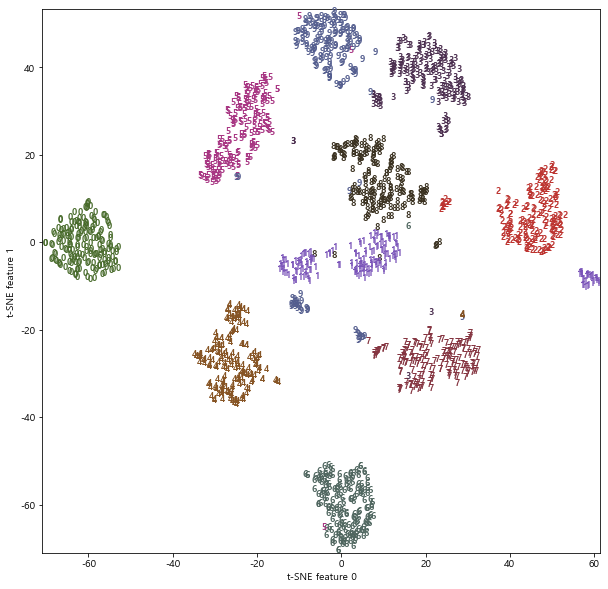

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')

# 군집 (clustering)

군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업이다.<br>
한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고,<br>
다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표임

## k-평균 군집

이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다.<br>
알고리즘은 두 단계를 반복하는데, 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정한다.

클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료된다

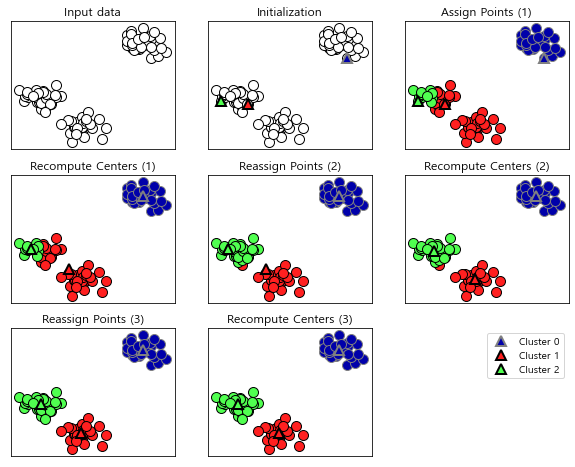

In [38]:
mglearn.plots.plot_kmeans_algorithm()

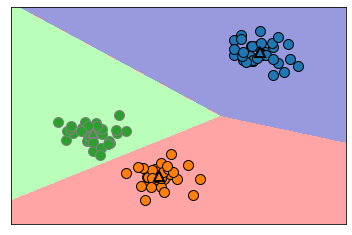

In [39]:
mglearn.plots.plot_kmeans_boundaries()

클러스터의 번호는 중요하지 않다.<br>
중요한 건 각 클러스터에 배정된 데이터 포인트가 같은 특성을 가진다는 것이며,<br>
클러스터 그룹의 선정 방식은 랜덤이기에 실행할 때 마다 바뀔 수 있다.

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성한다.
X, y = make_blobs(random_state=1)

# 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(f"클러스터 테이블: \n {kmeans.labels_}")

print()

print(kmeans.predict(X))

클러스터 테이블: 
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


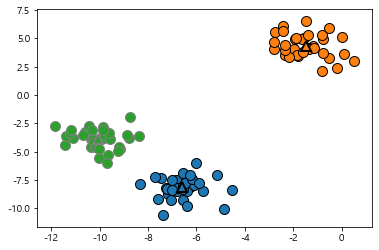

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2
)

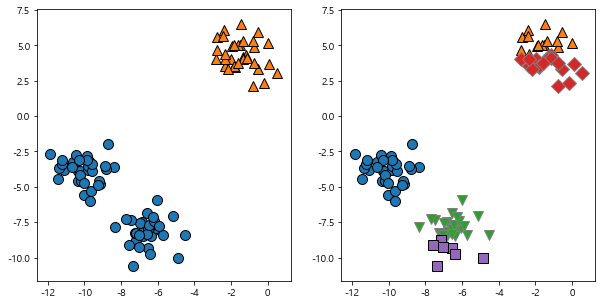

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러슽 중심 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### k-평균 알고리즘이 실패하는 경우

데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-평균 알고리즘이 항상 이를 구분해낼 수 있는 것은 아니다.<br>
각 클러스터를 정의하는 것이 중심 하나뿐이므로 둥근 형태로 나타난다.<br>
k-평균은 모든 클러스터의 반경이 똑같다고 가정하기에 클러스터 중심 사이의 정확히 중간에 경계를 그린다.<br>

이는 가끔 아래 그림처럼 예상치 않은 결과를 만든다.

Text(0, 0.5, 'Feature 1')

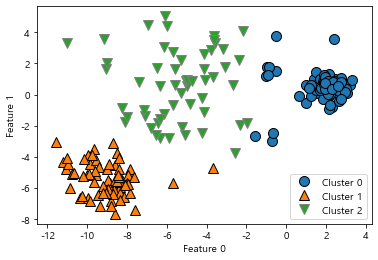

In [53]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

k-평균은 클러스터에서 모든 방향이 똑같이 중요하다고 가정한다.<br>
예를 들어 대각선으로 늘어서 있는 아래와 같은 그림은 상식적으로 그룹을 3개의 직선 형태의 그룹으로 나누어야 한다고 생각되는데... 가로로 잘라버렸다.

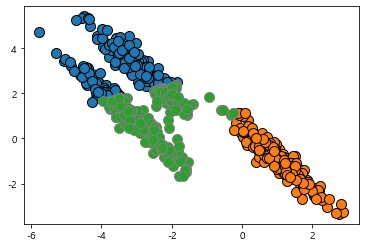

In [55]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

복잡한 형태라면 성능이 더 나빠진다


여기서 Noise란 데이터의 흩어짐 정도를 나타내는 듯 하다

Text(0, 0.5, 'Feature 1')

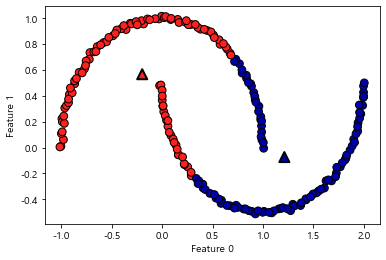

In [66]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.01, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
           edgecolors='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

##### 벡터 양자화 또는 분해 메서드로서의 k-평균

k-평균과 PCA나 NMF 같은 분해 알고리즘 사이에는 유사점이 있다.

PCA: 데이터에서 가장 큰 방향을 찾으려 한다.<br>
NMF: 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾는다.

두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현한다.<br>
반면에 k-평균은 클러스터 중심으로 각 데이터 포인트를 표현한다.

이는 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있다.<br>
k-평균을 이렇게 각 포인트가 하나의 성분으로 분해되는 간점으로 보는 것을<br>
<b>벡터 양자화</b>라고 한다

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42
)
nmf = NMF(n_components=100, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.invers_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [73]:
# fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
# fig.suptitle('추출한 성분')

# for ax, comp_kmeans, comp_pca, comp_nmf in zip(
#     axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
#     ax[0].imshow(comp_kmeans.reshape(image_shape))
#     ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
#     ax[2].imshow(comp_nmf.reshape(image_shape))
    
# axes[0, 0].set_ylabel('kmeans')
# axes[1, 0].set_ylabel('pca')
# axes[2, 0].set_ylabel('nmmf')

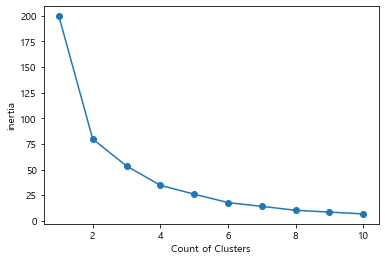

In [74]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Count of Clusters')
plt.ylabel('inertia')
plt.show()

## 병합 군집

병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고,<br>
그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다.<br>

scikit-learn에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합친다.<br>

linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다

다음은 scikit-learn에 구현된 옵션이다.


<b>ward</b><br>
기본 값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다.<br>
그래서 크기가 비교적 비슷한 클러스터가 만들어진다.

<b>average</b><br>
average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.

<b>complete</b><br>
compete 연결은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다


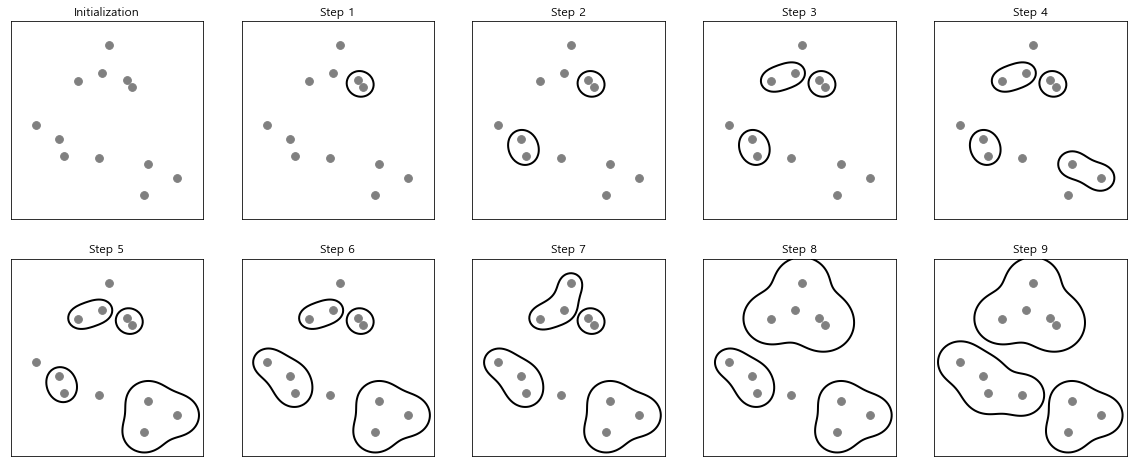

In [75]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

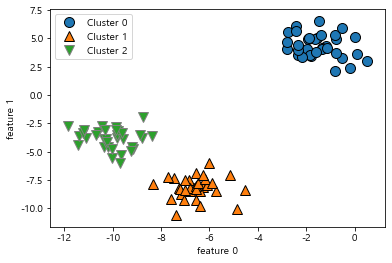

In [78]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')